# Analysis of Trials with Energy Included as Context (+E)
1. Why does base+E perform so much better than base?
2. Why does CoT+E underperform base+E? Where does CoT+E fail?
3. How can CoT+E be improved?

In [1]:
import sys

In [2]:
sys.path.append("/data/lucasjia/projects/nutri/src/multi-nutrient")
from analysis import *


1. Why does base+E perform so much better than base?

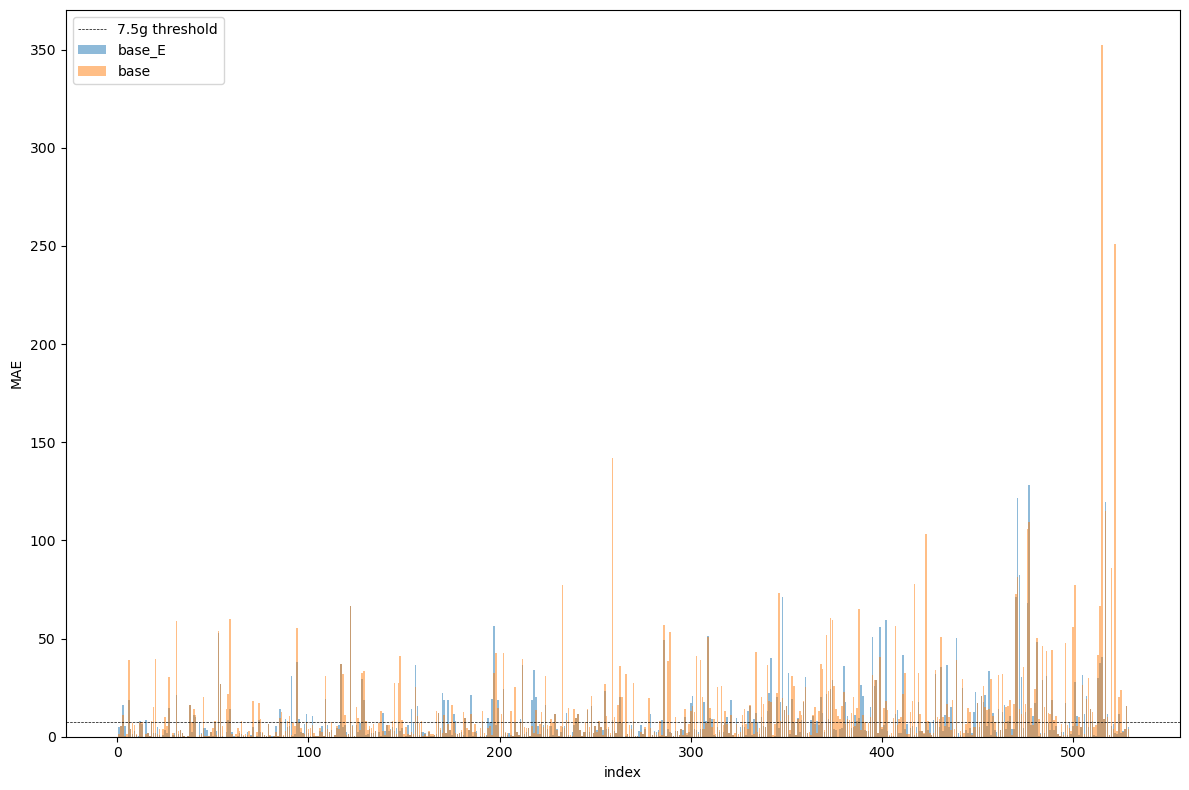

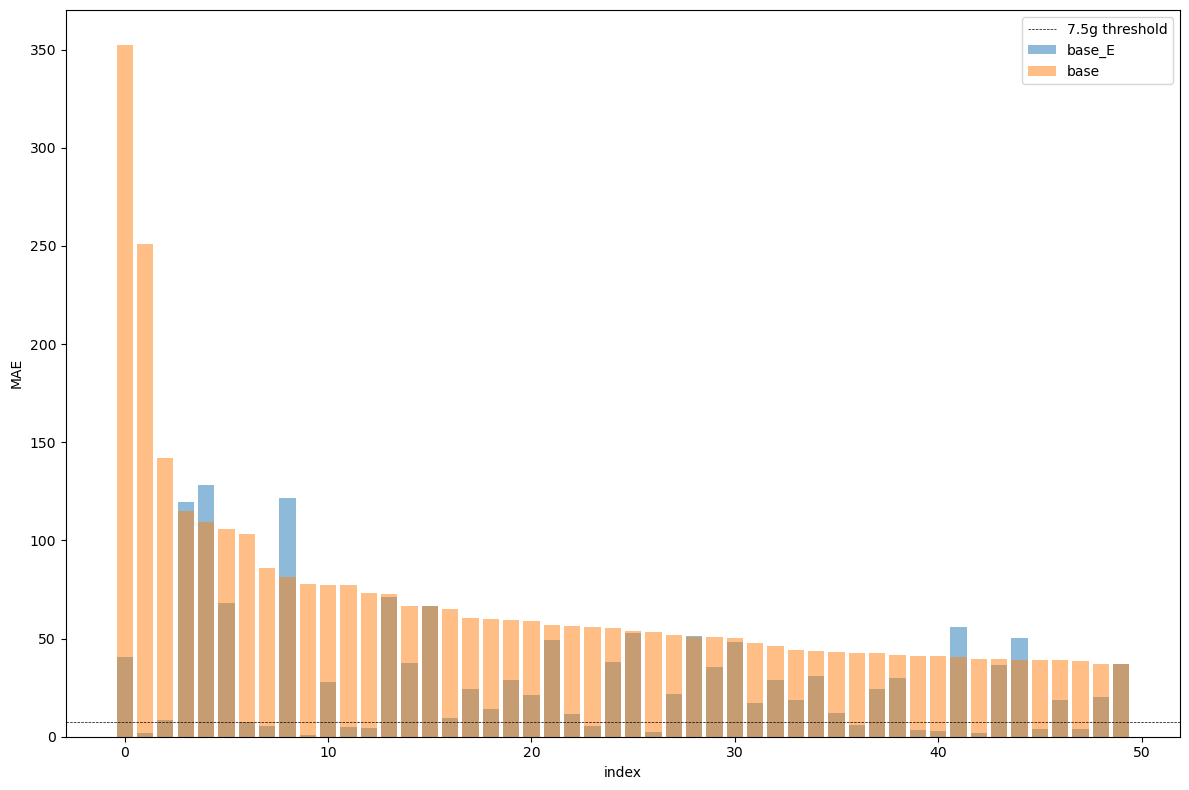

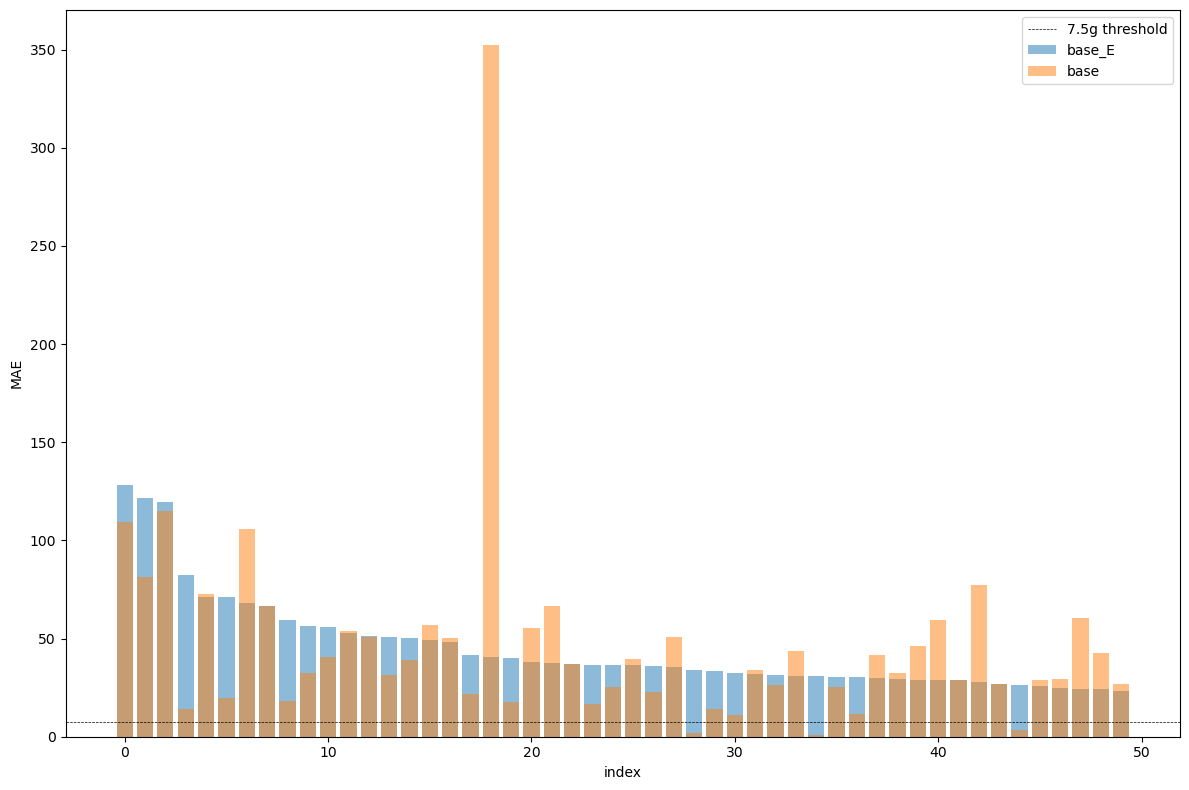

In [3]:
base_E_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_base_20250728_193327.jsonl"
base_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250722_043618.jsonl"
CoT_E_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_CoT_20250729_060935.jsonl"
CoT_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_cot_20250720_040226.jsonl"

base_E = filter_df(base_E_path, name="base_E")
base = filter_df(base_path, name="base")
CoT_E = filter_df(CoT_E_path, name="CoT_E")
CoT = filter_df(CoT_path, name="CoT")

base_comparison = combine_dfs([base_E, base])

t25_base = get_topk_mae(base_comparison, "base", 50)
t25_base_E = get_topk_mae(base_comparison, "base_E", 50)
# t25_base.to_csv("/data/lucasjia/projects/nutri/carb_top25_mae.csv", index=False)

bar_plot_errors(base_comparison, ["base_E", "base"])
bar_plot_errors(t25_base, ["base_E", "base"])
bar_plot_errors(t25_base_E, ["base_E", "base"])

1. Much better on outliers
2. Also improves on more modest errors (evident from much better accuracy not just better MAE) - uncertain of details

2. Why does CoT + E underperform base + E? Where does CoT + E fail?

In [4]:
context_comparison = combine_dfs([base_E, CoT_E, base])
t25_base_E = get_topk_mae(context_comparison, "base_E", 25)
t50_CoT_E = get_topk_mae(context_comparison, "CoT_E", 50)

# t25_CoT_E.to_csv("/data/lucasjia/projects/nutri/carb_cot_E_top25_mae.csv", index=False)
# t25_base_E.to_csv("/data/lucasjia/projects/nutri/carb_E_top25_mae.csv", index=False)
# bar_plot_errors(context_comparison, ["base_E", "base", "CoT_E"])
# bar_plot_errors(t50_CoT_E, ["base_E", "base", "CoT_E"])
# bar_plot_errors(t25_base_E, ["base_E", "base", "CoT_E"])

1. CoT+E shows similar but less improvement (than base+E) on base outliers
2. CoT+E also doesn't seem to be explicitly incorporating energy into it's reasoning path very often

CoT+E prompt 3

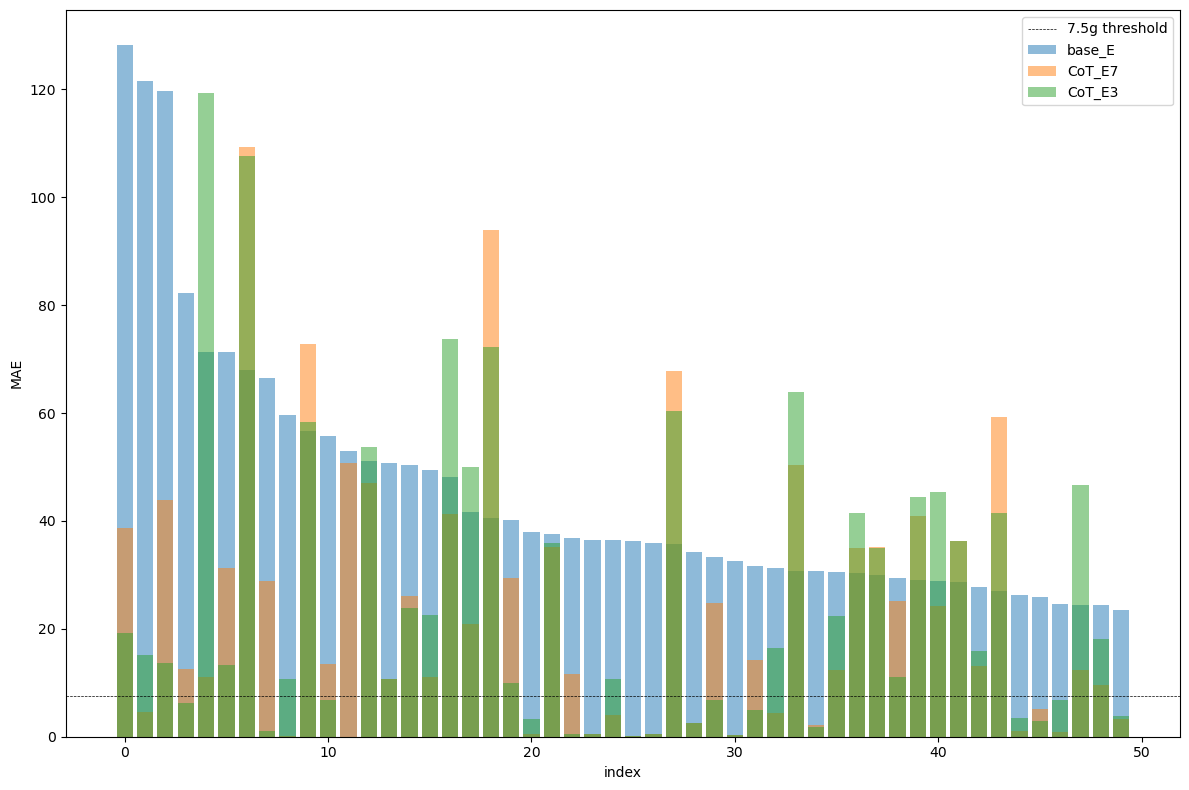

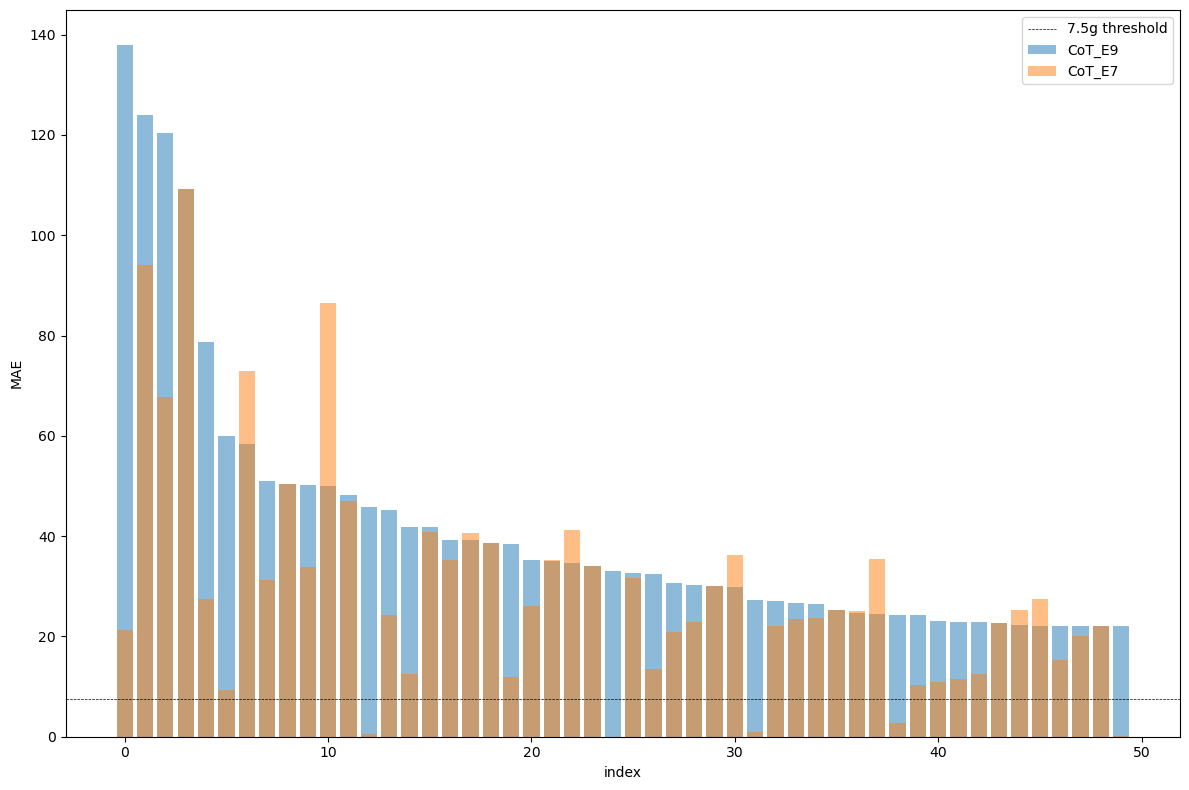

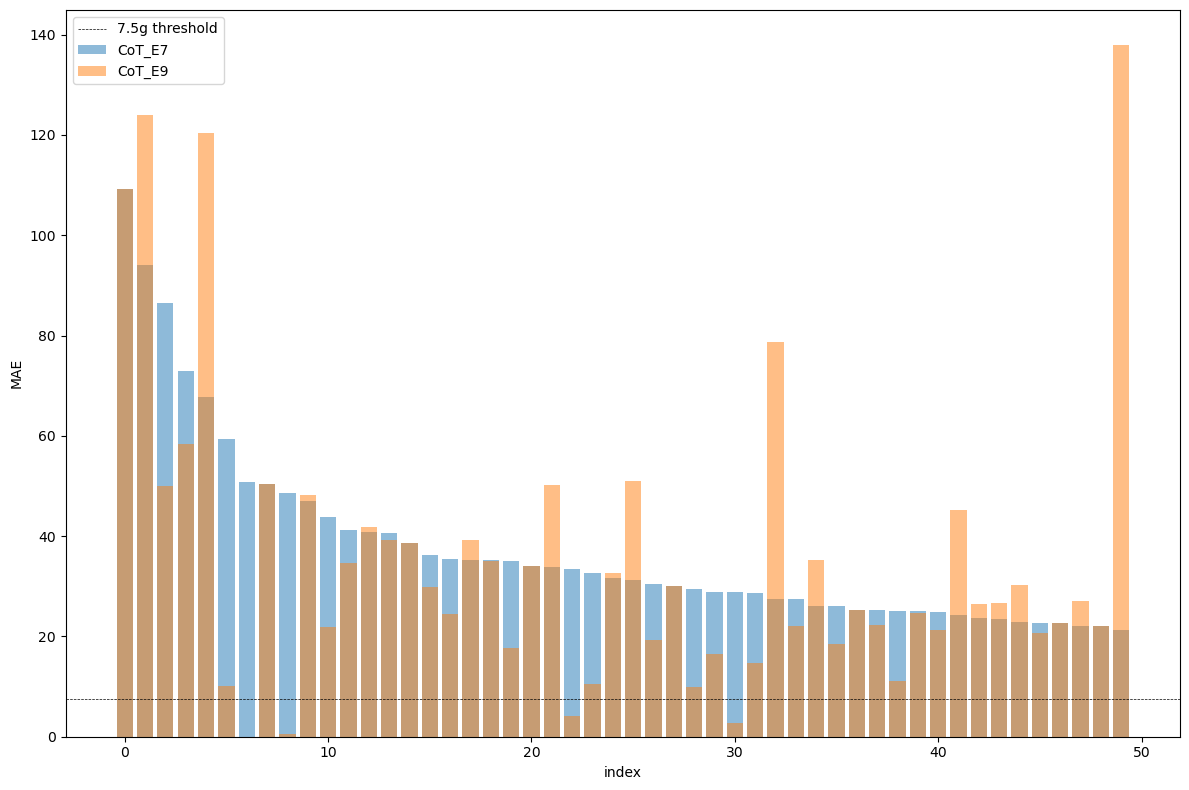

In [5]:
CoT_E3_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_CoT_20250801_185249.jsonl"
CoT_E7_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_CoT_20250803_082507.jsonl"
CoT_E9_path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_CoT_20250805_232214.jsonl"
path_dict = { "base_E" : base_E_path, "CoT_E7" :  CoT_E7_path, "CoT_E3" : CoT_E3_path}
compare_errors(path_dict, 50)
compare_errors( {"CoT_E9" : CoT_E9_path, "CoT_E7" : CoT_E7_path}, 50)
compare_errors( {"CoT_E7" : CoT_E7_path, "CoT_E9" : CoT_E9_path}, 50)

In [7]:
# CoT_E3 = filter_df(CoT_E3_path, "CoT_E3")
# CoT_E3_inspect = combine_dfs([CoT_E3, base_E, CoT_E])
# get_topk_mae(CoT_E3_inspect, "CoT_E3", k=25).to_csv("/data/lucasjia/projects/nutri/CoT_E3.csv", index=False)

CoT_E7  = filter_df(CoT_E7_path, "CoT_E7")
# CoT_E7_inspect = combine_dfs([CoT_E7, base_E, CoT_E3])
# get_topk_mae(CoT_E7_inspect, "CoT_E7",  k=50).to_csv("/data/lucasjia/projects/nutri/CoT_E7.csv", index=False)

CoT_E9 = filter_df(CoT_E9_path, "CoT_E9")
CoT_E9_inspect = combine_dfs([CoT_E7, CoT_E9])
get_topk_mae(CoT_E9_inspect, "CoT_E9", k=50).to_csv("/data/lucasjia/projects/nutri/results/error_samples/CoT_E9_2.csv", index=False)

In [14]:
base2 = filter_df(path="/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250726_185919.jsonl", name="base2")
full_df = combine_dfs([base, base2, CoT, base_E, CoT_E3, CoT_E7])
mae_df = full_df[["base_mae", "base2_mae", "CoT_mae", "base_E_mae", "CoT_E3_mae", "CoT_E7_mae"]]
pred_df = full_df[["base_pred", "base2_pred", "CoT_pred", "base_E_pred", "CoT_E3_pred", "CoT_E7_pred"]]
print(mae_df.corr())
print(pred_df.corr())


            base_mae  base2_mae   CoT_mae  base_E_mae  CoT_E3_mae  CoT_E7_mae
base_mae    1.000000   0.974557  0.671842    0.473949    0.462891    0.509979
base2_mae   0.974557   1.000000  0.653090    0.448526    0.455336    0.508596
CoT_mae     0.671842   0.653090  1.000000    0.290414    0.451138    0.490203
base_E_mae  0.473949   0.448526  0.290414    1.000000    0.391425    0.496389
CoT_E3_mae  0.462891   0.455336  0.451138    0.391425    1.000000    0.679825
CoT_E7_mae  0.509979   0.508596  0.490203    0.496389    0.679825    1.000000
             base_pred  base2_pred  CoT_pred  base_E_pred  CoT_E3_pred  \
base_pred     1.000000    0.989432  0.844306     0.837803     0.852560   
base2_pred    0.989432    1.000000  0.843211     0.832089     0.851321   
CoT_pred      0.844306    0.843211  1.000000     0.731916     0.798612   
base_E_pred   0.837803    0.832089  0.731916     1.000000     0.914306   
CoT_E3_pred   0.852560    0.851321  0.798612     0.914306     1.000000   
CoT_E7_pre

In [ ]:
CoT_E7_path2 = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1w2/samples_carb_CoT_20250806_003636.jsonl"
CoT_E7_2 = filter_df(CoT_E7_path2, "CoT_E7_2")

CoT_E7_2_inspect = combine_dfs([CoT_E7, CoT_E7_2, CoT_E9])
get_topk_mae(CoT_E7_2_inspect, "CoT_E7_2", k=50).to_csv("/data/lucasjia/projects/nutri/results/error_samples/CoT_E7_2.csv", index=False)

Effect of Energy Context: does CoT + E correct CoT errors?

In [9]:
CoT = filter_df("/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_CoT_20250719_051735.jsonl", "CoT")
CoT_inspect = combine_dfs([CoT_E7, CoT])
get_topk_mae(CoT_inspect, "CoT", k=50).to_csv("/data/lucasjia/projects/nutri/results/error_samples/CoT_vs_CoT_E7.csv", index=False)